# <font color="purple"><h3 align="center">Pandas Merge Tutorial</h3></font>

## <font color='blue'>Basic Merge Using a Dataframe Column</font>
- Merging is for doing complex column-wise combinations of dataframes in a SQL-like way. 


In [27]:
import pandas as pd
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

city  temperature
0  new york           21
1   chicago           14
2   orlando           35

In [28]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

city  humidity
0   chicago        65
1  new york        68
2   orlando        75

In [25]:
df3 = pd.merge(df1, df2, on="city")
df3

city  temperature  humidity
0  new york           21        68
1   chicago           14        65

## <font color='blue'>Type Of DataBase Joins</font>

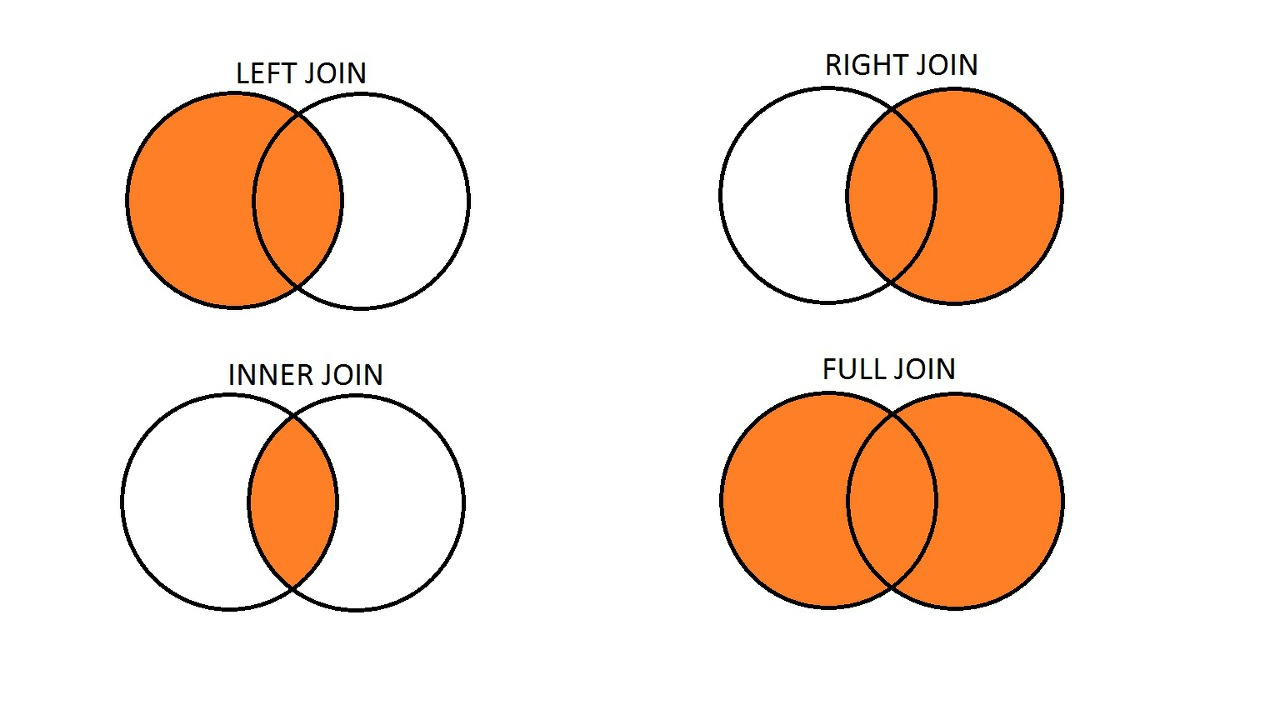

<img src="db_joins.jpg" height="800", width="800">

In [30]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1

city  temperature
0   new york           21
1    chicago           14
2    orlando           35
3  baltimore           38

In [31]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})


In [32]:
df3=pd.merge(df1,df2,on="city",how="inner")
df3

city  temperature  humidity
0  new york           21        68
1   chicago           14        65

In [36]:
df3=pd.merge(df1,df2,on="city",how="outer")
df3

city  temperature  humidity
0   new york         21.0      68.0
1    chicago         14.0      65.0
2    orlando         35.0       NaN
3  baltimore         38.0       NaN
4  san diego          NaN      71.0

In [33]:
df3=pd.merge(df1,df2,on="city",how="left")
df3

city  temperature  humidity
0   new york           21      68.0
1    chicago           14      65.0
2    orlando           35       NaN
3  baltimore           38       NaN

In [36]:
df3=pd.merge(df1,df2,on="city",how="right")
df3

city  temperature  humidity
0   new york         21.0        68
1    chicago         14.0        65
2  san diego          NaN        71

## <font color='blue'>indicator flag</font>

In [37]:
df3=pd.merge(df1,df2,on="city",how="outer",indicator=True)
df3

city  temperature  humidity      _merge
0   new york         21.0      68.0        both
1    chicago         14.0      65.0        both
2    orlando         35.0       NaN   left_only
3  baltimore         38.0       NaN   left_only
4  san diego          NaN      71.0  right_only

## <font color='blue'>suffixes</font>

In [38]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

city  temperature  humidity
0   new york           21        65
1    chicago           14        68
2    orlando           35        71
3  baltimore           38        75

In [39]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2


city  temperature  humidity
0    chicago           21        65
1   new york           14        68
2  san diego           35        71

In [42]:
df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second'))
df3

city  temperature_first  humidity_first  temperature_second  \
0   new york               21.0            65.0                14.0   
1    chicago               14.0            68.0                21.0   
2    orlando               35.0            71.0                 NaN   
3  baltimore               38.0            75.0                 NaN   
4  san diego                NaN             NaN                35.0   

   humidity_second  
0             68.0  
1             65.0  
2              NaN  
3              NaN  
4             71.0

temperature
city                 
new york           21
chicago            14
orlando            35

humidity
city              
chicago         65
new york        68
orlando         75

In [60]:
df1.join(df2,lsuffix='_l', rsuffix='_r')

temperature  humidity
city                           
new york           21        68
chicago            14        65
orlando            35        75